### Import relevant libraries and load data

In [17]:
# Import relevant libraries

# For data manipulation
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks") # set style of plots

# For testing
from scipy.stats import mannwhitneyu

In [18]:
# Read in data
df = pd.read_csv("../data/processed/bioactivity_data_final.csv")

In [19]:
# Check dataframe
df.head()

,molecule_chembl_id,class_label,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL185698,inactive,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,421.190,2.6605,0.0,4.0,4.869666
1,CHEMBL426082,inactive,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,293.347,3.6308,0.0,3.0,4.882397
2,CHEMBL365134,active,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,372.243,4.3933,0.0,3.0,6.008774
3,CHEMBL190743,active,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,419.243,4.2354,0.0,3.0,6.022276
4,CHEMBL365469,inactive,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,327.792,4.2842,0.0,3.0,4.950782


In [20]:
# Remove intermediate label
df = df[df["class_label"] != "intermediate"]

### Frequency plot for both classes

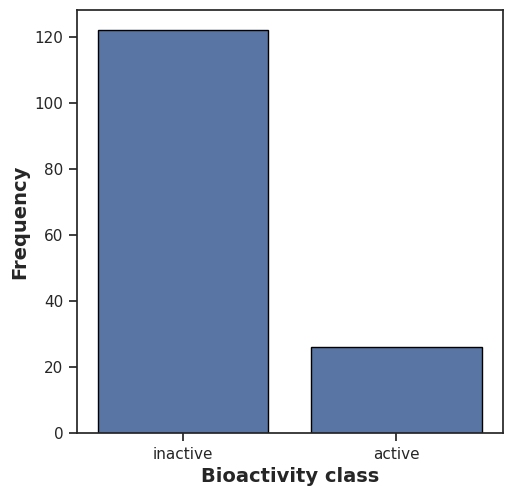

In [21]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x="class_label", data=df, edgecolor="black")

plt.xlabel("Bioactivity class", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")

plt.savefig("../data/results/plot_bioactivity_class.png")

### Scatter plot for MW vs. LogP

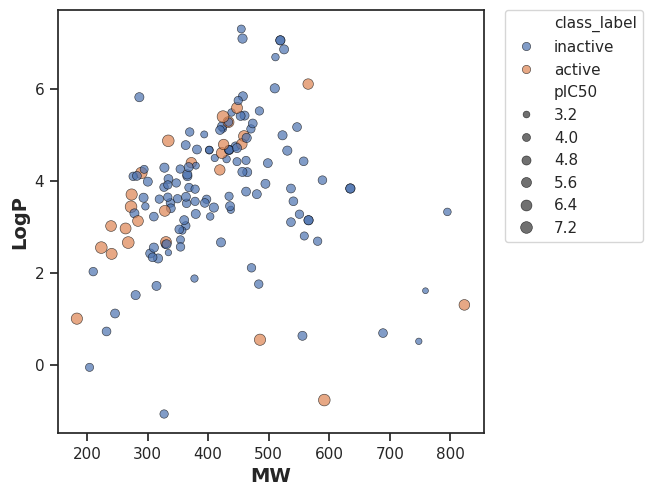

In [22]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x="MW", y="LogP", data=df, hue="class_label", size="pIC50", edgecolor="black", alpha=0.7)

plt.xlabel("MW", fontsize=14, fontweight="bold")
plt.ylabel("LogP", fontsize=14, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

plt.savefig("../data/results/plot_MW_vs_LogP.png")

### Box plots

In [23]:
# For testing divide dataframe in active and inactive
active = df[df["class_label"] == "active"]
inactive = df[df["class_label"] == "inactive"]

##### 1. pIC50

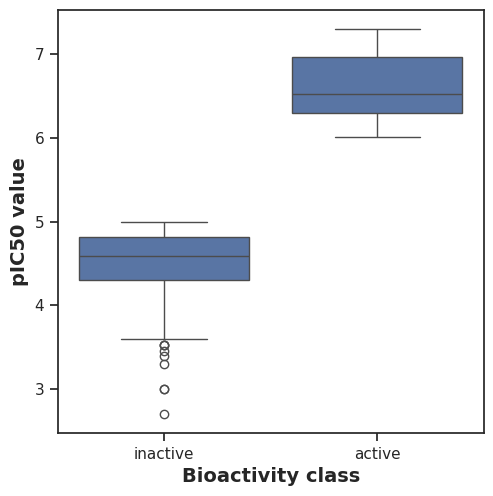

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = "class_label", y = "pIC50", data = df)

plt.xlabel("Bioactivity class", fontsize=14, fontweight="bold")
plt.ylabel("pIC50 value", fontsize=14, fontweight="bold")

plt.savefig("../data/results/plot_ic50.png")

In [25]:
# Apply Mann-Whitney U-test to check for significant difference between both groups
statistic, pvalue = mannwhitneyu(active.pIC50, inactive.pIC50)

if pvalue < 0.05:
    print(f"p-value ({pvalue}) below threshold of 0.05 \nreject null-hypothesis, significant difference between groups")
else:
    print(f"p-value ({pvalue}) not below threshold of 0.05 \ncannot reject null-hypothesis, no significant difference between groups")

p-value (1.317801506217414e-15) below threshold of 0.05 
reject null-hypothesis, significant difference between groups


##### 2. MW

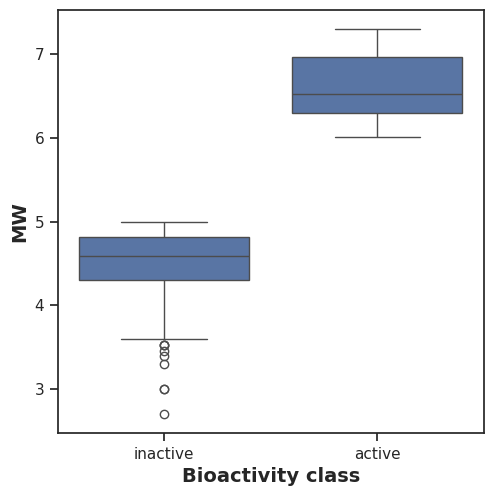

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = "class_label", y = "pIC50", data = df)

plt.xlabel("Bioactivity class", fontsize=14, fontweight="bold")
plt.ylabel("MW", fontsize=14, fontweight="bold")

plt.savefig("../data/results/plot_MW.png")

In [27]:
# Apply Mann-Whitney U-test to check for significant difference between both groups
statistic, pvalue = mannwhitneyu(active.MW, inactive.MW)

if pvalue < 0.05:
    print(f"p-value ({pvalue}) below threshold of 0.05 \nreject null-hypothesis, significant difference between groups")
else:
    print(f"p-value ({pvalue}) not below threshold of 0.05 \ncannot reject null-hypothesis, no significant difference between groups")

p-value (0.038360292652786225) below threshold of 0.05 
reject null-hypothesis, significant difference between groups


##### 3. LogP

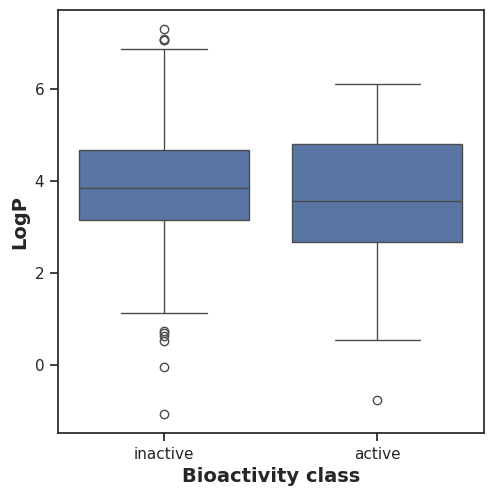

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = "class_label", y = "LogP", data = df)

plt.xlabel("Bioactivity class", fontsize=14, fontweight="bold")
plt.ylabel("LogP", fontsize=14, fontweight="bold")

plt.savefig("../data/results/plot_LogP.png")

In [29]:
# Apply Mann-Whitney U-test to check for significant difference between both groups
statistic, pvalue = mannwhitneyu(active.LogP, inactive.LogP)

if pvalue < 0.05:
    print(f"p-value ({pvalue}) below threshold of 0.05 \nreject null-hypothesis, significant difference between groups")
else:
    print(f"p-value ({pvalue}) not below threshold of 0.05 \ncannot reject null-hypothesis, no significant difference between groups")

p-value (0.5656751986225831) not below threshold of 0.05 
cannot reject null-hypothesis, no significant difference between groups


##### 4. NumHDonors

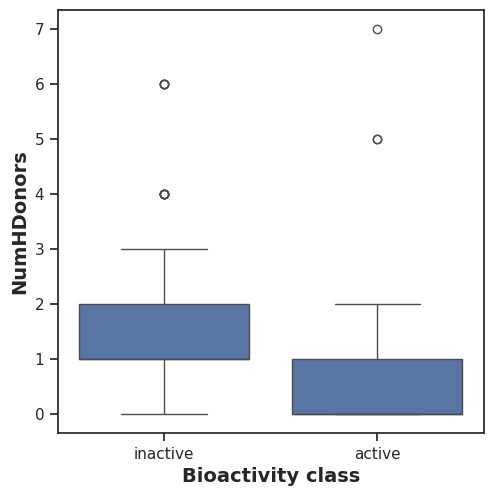

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = "class_label", y = "NumHDonors", data = df)

plt.xlabel("Bioactivity class", fontsize=14, fontweight="bold")
plt.ylabel("NumHDonors", fontsize=14, fontweight="bold")

plt.savefig("../data/results/plot_NumHDonors.png")

In [31]:
# Apply Mann-Whitney U-test to check for significant difference between both groups
statistic, pvalue = mannwhitneyu(active.NumHDonors, inactive.NumHDonors)

if pvalue < 0.05:
    print(f"p-value ({pvalue}) below threshold of 0.05 \nreject null-hypothesis, significant difference between groups")
else:
    print(f"p-value ({pvalue}) not below threshold of 0.05 \ncannot reject null-hypothesis, no significant difference between groups")

p-value (0.0008242884325292374) below threshold of 0.05 
reject null-hypothesis, significant difference between groups


##### 5. NumHAcceptors

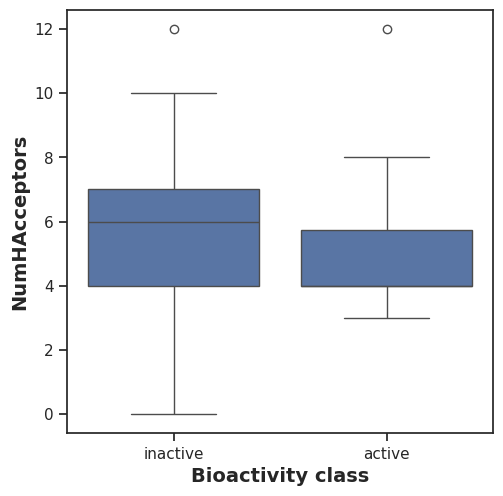

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = "class_label", y = "NumHAcceptors", data = df)

plt.xlabel("Bioactivity class", fontsize=14, fontweight="bold")
plt.ylabel("NumHAcceptors", fontsize=14, fontweight="bold")

plt.savefig("../data/results/plot_NumHAcceptors.png")

In [33]:
# Apply Mann-Whitney U-test to check for significant difference between both groups
statistic, pvalue = mannwhitneyu(active.NumHAcceptors, inactive.NumHAcceptors)

if pvalue < 0.05:
    print(f"p-value ({pvalue}) below threshold of 0.05 \nreject null-hypothesis, significant difference between groups")
else:
    print(f"p-value ({pvalue}) not below threshold of 0.05 \ncannot reject null-hypothesis, no significant difference between groups")

p-value (0.037166378059633264) below threshold of 0.05 
reject null-hypothesis, significant difference between groups
